<a href="https://colab.research.google.com/github/Sourabh7k-Insights/Aerofit_Project/blob/main/Aerofit_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aerofit Case Study

##Input Provided :
### **Dataset**:
The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months.

**Dataset Link**: [Aerofit_treadmill.csv](https://www.scaler.com/academy/mentee-dashboard/class/249015/project/problems/18046?navref=cl_tt_crd_sl)


## 1. Data Import and Cleaning

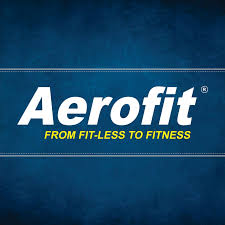

In [1]:
# @title Aerofit Case Study  {"display-mode":"code"}
from IPython.display import Image

# Display the uploaded image
Image(filename='/content/sample_data/Aerofit.jpeg',width=500, height=400)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/sample_data/aerofit_treadmill.csv')
pd.set_option('display.max_columns', None)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
print("Data Types of Each Column:")
df.dtypes.reset_index()

Data Types of Each Column:


,index,0
0,Product,object
1,Age,int64
2,Gender,object
3,Education,int64
4,MaritalStatus,object
5,Usage,int64
6,Fitness,int64
7,Income,int64
8,Miles,int64


In [4]:
print("\nShape of the Dataset (rows, columns):")
df.shape


Shape of the Dataset (rows, columns):


(180, 9)

In [5]:
print("\nMissing Values in Each Column:")
df.isnull().sum().reset_index()


Missing Values in Each Column:


,index,0
0,Product,0
1,Age,0
2,Gender,0
3,Education,0
4,MaritalStatus,0
5,Usage,0
6,Fitness,0
7,Income,0
8,Miles,0


In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


##2. Detecting outliers

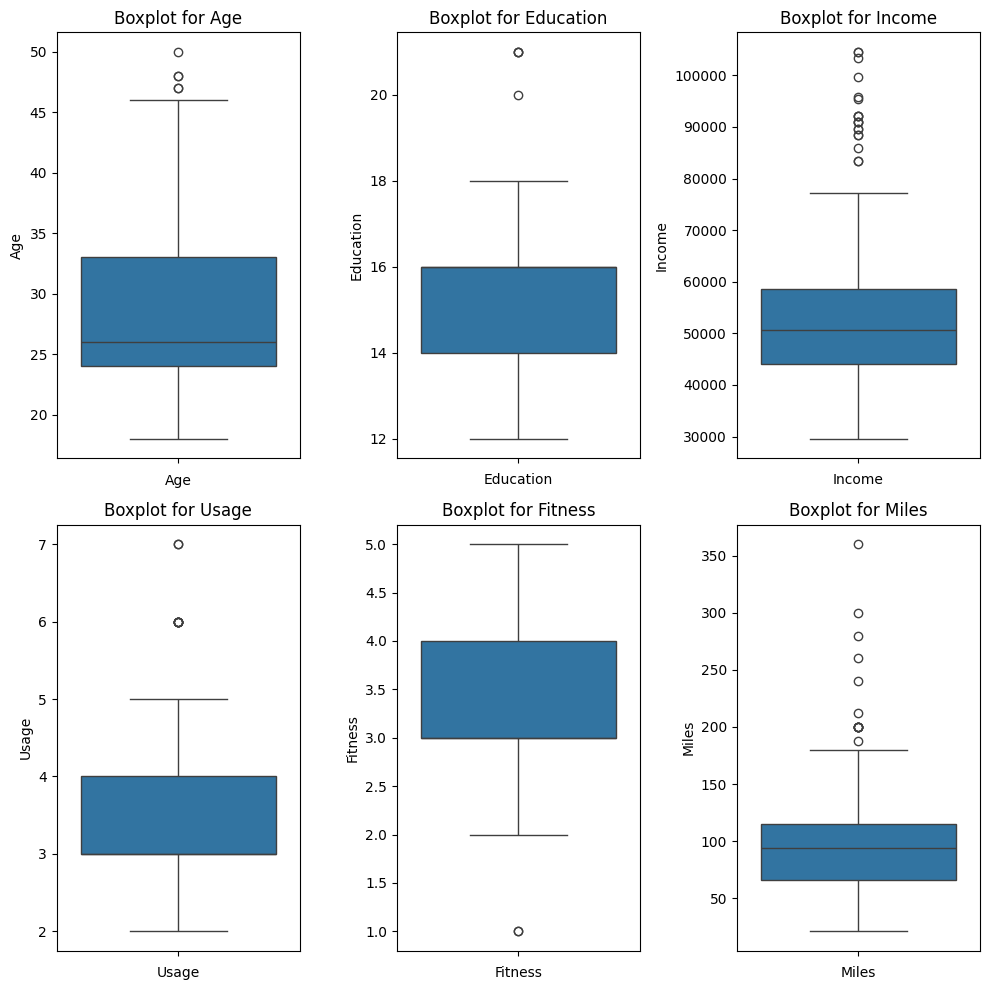

In [7]:
numerical_cols = ['Age', 'Education', 'Income', 'Usage', 'Fitness', 'Miles']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
axes = axes.flatten()

for i in range(len(numerical_cols)):
    sns.boxplot(data=df[numerical_cols[i]], ax=axes[i])
    axes[i].set_title(f'Boxplot for {numerical_cols[i]}')
    axes[i].set_xlabel(numerical_cols[i])
plt.tight_layout()
plt.show()


**For Age:** The average age of customers is approximately 28.79 years, with a range from 18 to 50 years

**For Usage:** The average usage score is 3.31, with a range from 1 to 5. This suggests that customers generally use the product quite frequently

**For Fitness:** The average fitness score is 3.46, indicating a moderate level of fitness among users. The maximum score of 5 suggests that some customers are very fit.


##3. Relationship Between Features and Product Purchased

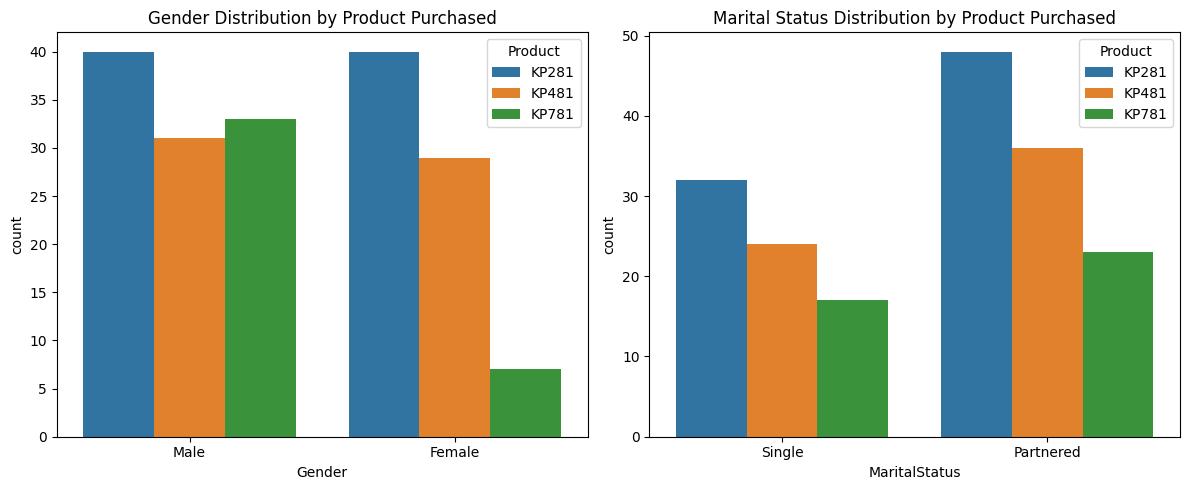

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Gender', hue='Product')
plt.title('Gender Distribution by Product Purchased')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='MaritalStatus', hue='Product')
plt.title('Marital Status Distribution by Product Purchased')
plt.tight_layout()
plt.show()



##4. Contingency Tables and Calculate Probabilities

In [9]:
marginal_count = pd.crosstab(index=df['Product'], columns='count')
# print(marginal_count)

marginal_probability = marginal_count / marginal_count.sum()

print("Marginal Probability of Product Purchases:\n")
marginal_probability


Marginal Probability of Product Purchases:



col_0,count
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


In [10]:
gender_product_crosstab = pd.crosstab(index=df['Gender'], columns=df['Product'])
# print(gender_product_crosstab)
conditional_prob = gender_product_crosstab.loc['Female', 'KP481'] / gender_product_crosstab.loc['Female'].sum()
print("\nConditional Probability of a Female customer purchasing KP481:\n", conditional_prob)


Conditional Probability of a Female customer purchasing KP481:
 0.3815789473684211


In [11]:
conditional_prob_table = pd.crosstab(index=df['Gender'], columns=df['Product'], normalize='index')
print("\nConditional Probability Table (Gender vs Product):\n")
conditional_prob_table


Conditional Probability Table (Gender vs Product):



Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


**For Male Customers:**

1. There is a relatively balanced interest in the various treadmill models, with preferences influenced by factors such as price, usage, and features.
2. This suggests that male buyers assess their options based on how well the treadmills meet their specific needs and requirements

**For Female Customers:**
1. Females show a strong preference for KP281, indicating that this product resonates well with female buyers. This could be due to its features, pricing, or perceived value.
2. The second most preferred option for females. The moderate acceptance suggests that KP481 also meets the needs of female customers.
3. A significantly lower percentage indicates that females are less interested in KP781, which may be perceived as too advanced or expensive for their preferences.


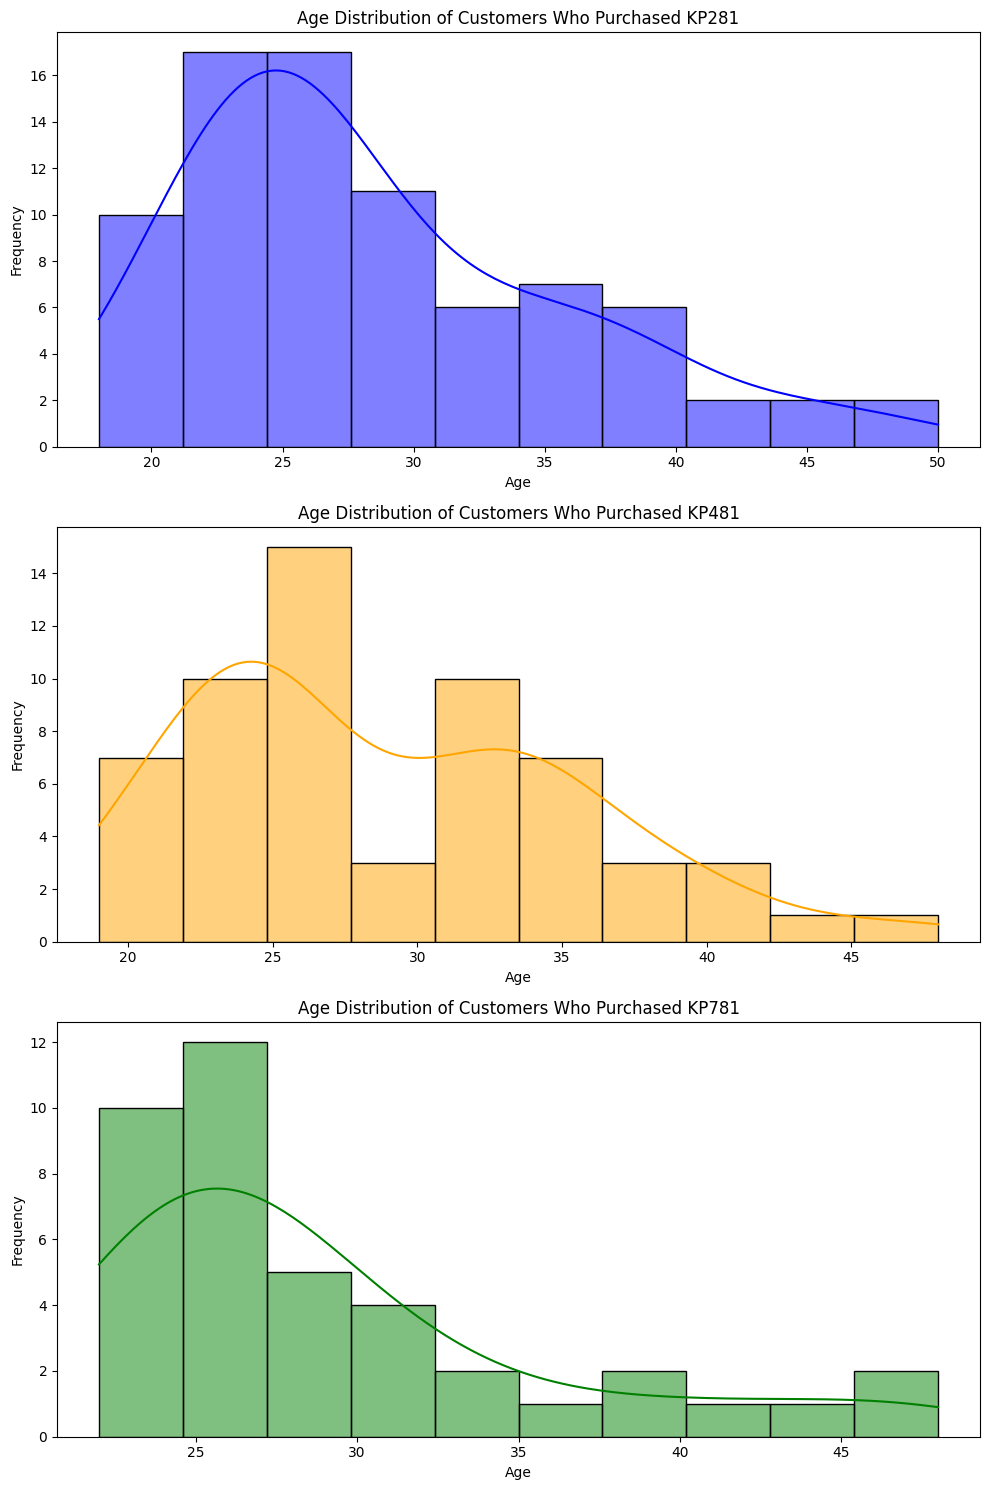

In [12]:
products = df['Product'].unique()
fig, axes = plt.subplots(nrows=len(products), ncols=1, figsize=(10, 15))
colors = ['blue', 'orange', 'green']

i = 0
for product in products:
    product_age_distribution = df[df['Product'] == product]['Age']
    sns.histplot(product_age_distribution, bins=10, kde=True, ax=axes[i], color=colors[i])

    axes[i].set_title(f'Age Distribution of Customers Who Purchased {product}')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Frequency')

    i += 1

plt.tight_layout()
plt.show()

## Insights on Age Distribution of Customers as per each product
**KP281 (Entry-level treadmill):**

The majority of customers purchasing KP281 are in the age range of 23 to 30 years .This suggests that younger adults, especially those in their mid-20s, prefer this product.

**KP481 (Mid-level treadmill):**

There is a wider spread of ages for KP481, with concentrations around ages 25, 33, and 34. This indicates that both young adults and slightly older customers are interested in this product.

**KP781 (Advanced-level treadmill):**

Most customers are clustered in the age range of 23 to 30, with peaks at ages 24 and 25. This indicates a similar trend to KP281 but with fewer customers overall.


Mean Fitness Scores by Product:
 Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64


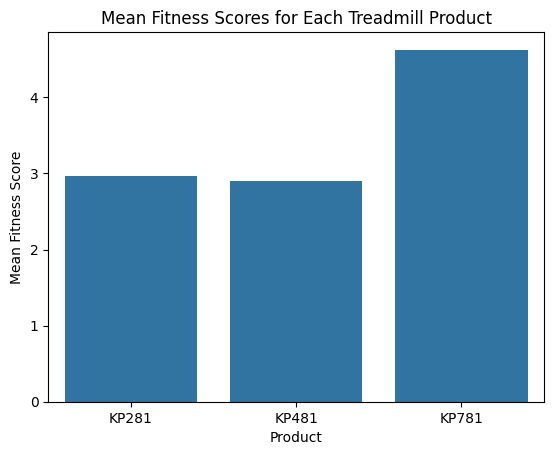

In [13]:
fitness_effect = df.groupby('Product')['Fitness'].mean()
print("\nMean Fitness Scores by Product:\n", fitness_effect)

sns.barplot(x=fitness_effect.index, y=fitness_effect.values)
plt.title('Mean Fitness Scores for Each Treadmill Product')
plt.xlabel('Product')
plt.ylabel('Mean Fitness Score')
plt.show()


## Insights on Mean Fitness Scores for Each Treadmill Product
**KP281 Customers:**

With Mean fitness score of **2.96**

This suggests that customers who prefer this model may have a moderate fitness level or are looking for a treadmill suitable for beginners or casual use.

**KP481 Customers:**

With Mean fitness score of **2.90**

This indicates that KP481 buyers might also fall within a similar fitness level category as KP281 buyers, likely favoring treadmills that offer basic functionality and are budget-friendly.

**KP781 Customers:**

With Mean fitness score of **4.62**

This suggests that customers who purchase the KP781 model are likely more fitness-oriented or have advanced fitness levels. They might be looking for a treadmill with more features, higher performance, and durability.




##5. Heatmap for Correlation for different Factors

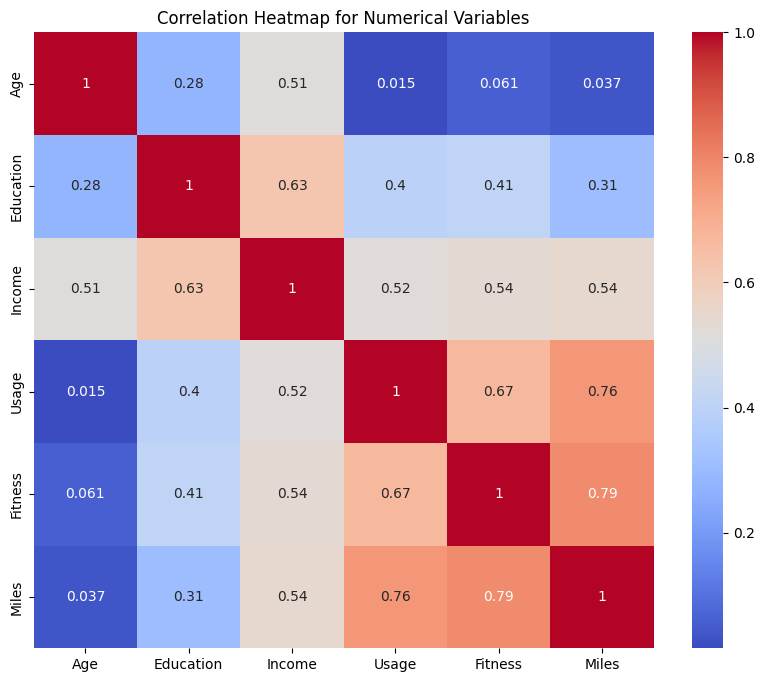

In [14]:
corr = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

##Insights for Correlation in values
**1. Usage and Miles (0.759):**

Usage and Miles have a very strong positive correlation, which indicates that customers who use the treadmill more frequently (higher Usage) also tend to log more miles on it. This is expected since higher usage naturally leads to covering more distance.

**2. Fitness and Miles (0.786):**

The strong positive correlation between Fitness and Miles suggests that as customers’ fitness levels improve, they tend to cover more miles on the treadmill. This indicates that customers with a higher fitness level use the treadmill more effectively and cover greater distances during their workouts.

**3.Usage and Fitness (0.669):**

There is a strong positive correlation between Usage and Fitness, implying that customers who use the treadmill more often have higher fitness levels. This suggests that increased treadmill usage could be associated with improved fitness.


##6. Customer profiling and Recommendations
**KP281 (Entry-level treadmill):**

1. Most customers are in their mid-20s to early 30s, indicating that this treadmill is popular among younger adults.

2. The KP281 model seems to attract individuals in the lower-middle to middle-income range, likely due to its affordability and value-for-money features.

**KP481 (Mid-level treadmill):**

1. KP481 customers tend to be in their early 30s, indicating that this model appeals to slightly older customers compared to KP281.

2. This model is attractive to mid-income customers, suggesting that it might be positioned as a slightly premium option with additional features over KP281.

**KP781 (Advanced-level treadmill):**

1. The marketing for KP781 can emphasize performance, advanced features, and high-quality build to attract male customers who are fitness enthusiasts or professionals.

2. KP781 attracts high-income customers, indicating it is seen as a premium treadmill option. Marketing should highlight advanced features, build quality, and long-term value.

## Recommendations:
###**Targeted Audience**:
1. **KP281** as a budget-friendly option for younger customers looking for basic features.

2. **KP481** as an option with additional features, targeting female customers and mid-income segments.

3. **KP781** as a premium product for high-income customers, focusing on performance and advanced fitness tracking.

###**Targeted Marketing Campaigns:**
1. Create separate marketing campaigns based on age and gender preferences for each product.
2. Utilize fitness forums, and professional networks for KP781’s advanced features.

###**Education and Fitness Awareness Campaigns:**
1. Since Education has a moderate correlation with Fitness, consider conducting fitness awareness campaigns focused on educating customers about the health benefits of regular treadmill use. This could involve providing access to training programs, fitness tips, and online resources.

































